In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier,PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import plot_importance
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fancyimpute import KNN,SoftImpute

In [4]:
data=pd.read_csv('LoansTrainingSetV2.csv',low_memory=False)

In [5]:
data.shape

(111107, 19)

In [6]:
data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [7]:
data.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Loan Given,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Loan Given,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Loan Given,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Loan Given,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0
111106,f83ae0e1-bd30-46c7-9f72-f4f9fe2f36ca,74187e35-39c2-4010-ae0d-8bcd0544189e,Loan Given,9209,Long Term,708.0,< 1 year,Own Home,123454.0,Debt Consolidation,668.71,20.1,16.0,8,0,6835,9261,0.0,0.0


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

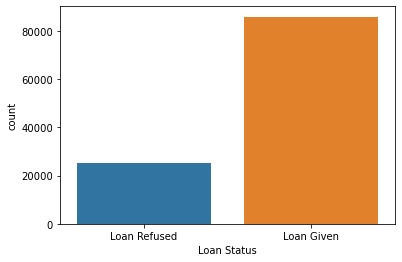

In [8]:
sns.countplot(data['Loan Status'])

In [9]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


In [10]:
data.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

Loan status is the label(outcome whether loan is granted or not).

In [11]:
#Loan ID is the primary key-keep first record for a particular loan id,inplace-dataframe gets over written
data.drop_duplicates(subset='Loan ID',keep='first',inplace=True)

In [12]:
data.shape

(88910, 19)

In [13]:
status=data['Loan Status'].value_counts()

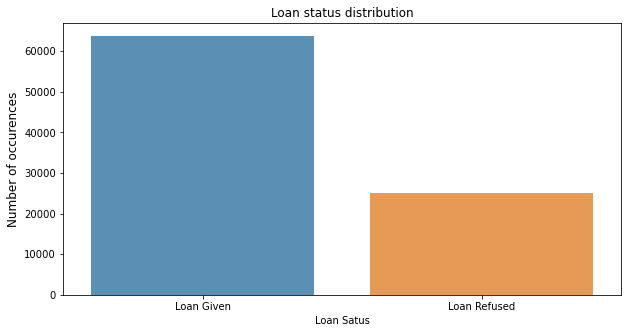

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(status.index,status.values,alpha=0.8)
plt.title('Loan status distribution')
plt.ylabel('Number of occurences',fontsize=12)
plt.xlabel('Loan Satus')
plt.show()

In [15]:
data['Current Loan Amount'].describe()

count    8.891000e+04
mean     1.433878e+07
std      3.502996e+07
min      4.910000e+02
25%      8.283000e+03
50%      1.435500e+04
75%      2.448500e+04
max      1.000000e+08
Name: Current Loan Amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

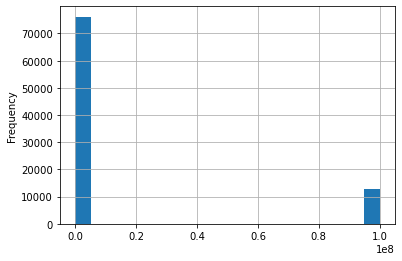

In [16]:
data['Current Loan Amount'].plot.hist(grid=True,bins=20)

In [17]:
x=np.percentile(data['Current Loan Amount'],q=[25,75])
print(x)

[ 8283. 24485.]


In [18]:
IQR=x[1]-x[0]
print(IQR)

16202.0


<AxesSubplot:xlabel='Term', ylabel='count'>

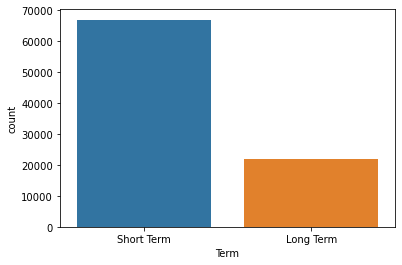

In [19]:
sns.countplot(data['Term'])

In [20]:
data['Credit Score'].isnull().sum()

21338

In [21]:
#Divide the values greater than 800 by 10
data['Credit Score']=np.where(data['Credit Score']>800,data['Credit Score']/10,data['Credit Score'])

In [22]:
median_credit=statistics.median(data['Credit Score'])
print(median_credit)

685.0


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

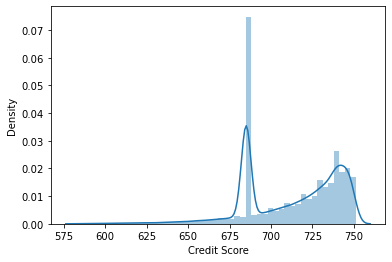

In [23]:
data['Credit Score'].fillna(median_credit,inplace =True)
sns.distplot(data['Credit Score'])

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

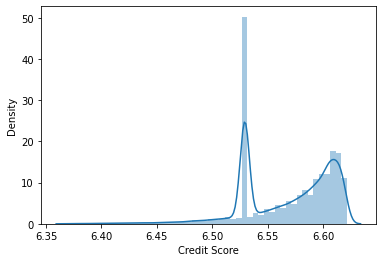

In [24]:
sns.distplot(np.log(data['Credit Score']))

In [25]:
data['Credit Score']=np.where(data['Credit Score']==685.0,741,data['Credit Score'])

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

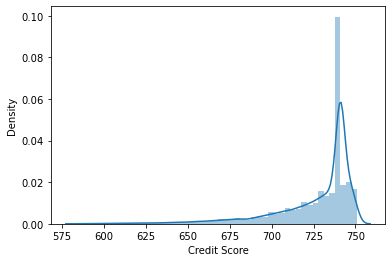

In [26]:
sns.distplot(data['Credit Score'])

In [27]:
data['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [28]:
data['Home Ownership']=data['Home Ownership'].str.replace('HaveMortgage','Home Mortgage',regex=True)

In [29]:
data['Annual Income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

In [30]:
data['Annual Income'].quantile([0.25,0.50,0.75,0.99,0.999])

0.250     44586.00
0.500     61494.00
0.750     86750.25
0.990    239286.96
0.999    491575.77
Name: Annual Income, dtype: float64

In [31]:
data.loc[data['Annual Income']>239287,'Annual Income']=239287

In [32]:
data['Purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: Purpose, dtype: int64

In [33]:
data['Purpose']=data['Purpose'].str.replace('Other','other',regex=True)

In [34]:
data['Monthly Debt'].describe()

count     88910
unique    70066
top           0
freq         69
Name: Monthly Debt, dtype: object

<AxesSubplot:xlabel='Monthly Debt', ylabel='Density'>

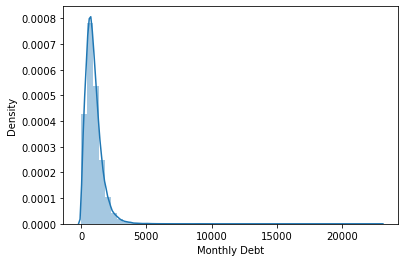

In [35]:
data['Monthly Debt']=data['Monthly Debt'].str.replace('$','',regex=True)
data['Monthly Debt']=pd.to_numeric(data['Monthly Debt'])
sns.distplot(data['Monthly Debt'])

In [36]:
data['Monthly Debt'].quantile([0.2,0.75,0.95,0.99,0.999])

0.200     463.75000
0.750    1250.52750
0.950    2115.51100
0.990    3087.11100
0.999    4926.37475
Name: Monthly Debt, dtype: float64

<AxesSubplot:xlabel='Monthly Debt', ylabel='Density'>

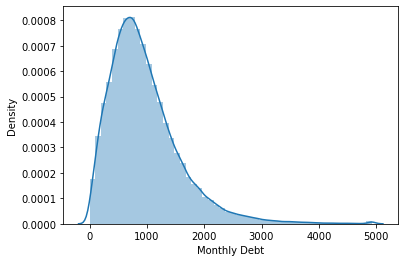

In [37]:
data.loc[data['Monthly Debt']>4926,'Monthly Debt']=4926
sns.distplot(data['Monthly Debt'])

<AxesSubplot:xlabel='Years of Credit History', ylabel='Density'>

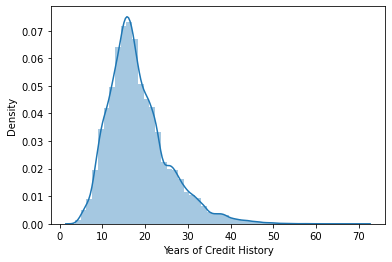

In [38]:
data['Years of Credit History'].value_counts()
sns.distplot(data['Years of Credit History'])

In [39]:
#Will have to handle the missing values in last delinquent
data['Months since last delinquent'].isna().sum()

48506

In [40]:
data['Number of Open Accounts'].describe()

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: Number of Open Accounts, dtype: float64

<AxesSubplot:xlabel='Number of Open Accounts', ylabel='Density'>

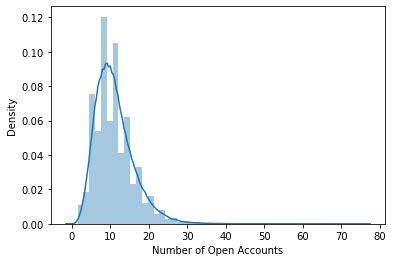

In [41]:
sns.distplot(data['Number of Open Accounts'])

In [42]:
data['Number of Open Accounts'].quantile([0.75,0.999,1])

0.750    14.0
0.999    36.0
1.000    76.0
Name: Number of Open Accounts, dtype: float64

<AxesSubplot:xlabel='Number of Open Accounts', ylabel='Density'>

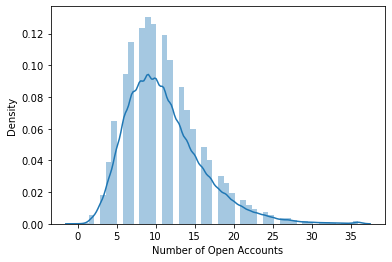

In [43]:
data.loc[data['Number of Open Accounts']>36,'Number of Open Accounts']=36
sns.distplot(data['Number of Open Accounts'])

In [44]:
data['Current Credit Balance'].describe()

count    8.891000e+04
mean     1.543593e+04
std      1.965873e+04
min      0.000000e+00
25%      5.949000e+03
50%      1.103900e+04
75%      1.930100e+04
max      1.730472e+06
Name: Current Credit Balance, dtype: float64

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Density'>

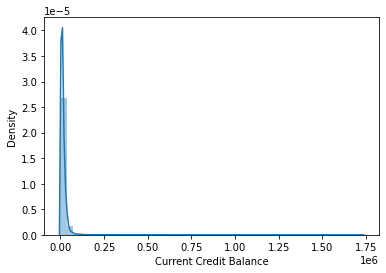

In [45]:
sns.distplot(data['Current Credit Balance'])

In [46]:
data['Current Credit Balance'].quantile([0.75,0.95,0.99,0.999,1])

0.750      19301.000
0.950      39933.300
0.990      81007.190
0.999     227670.033
1.000    1730472.000
Name: Current Credit Balance, dtype: float64

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Density'>

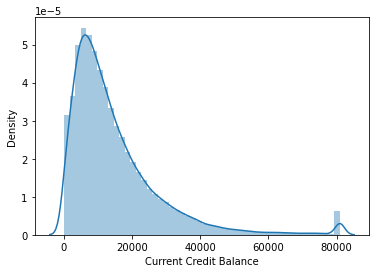

In [47]:
data.loc[data['Current Credit Balance']>81007,'Current Credit Balance']=81007
sns.distplot(data['Current Credit Balance'])

<AxesSubplot:xlabel='Current Credit Balance', ylabel='Density'>

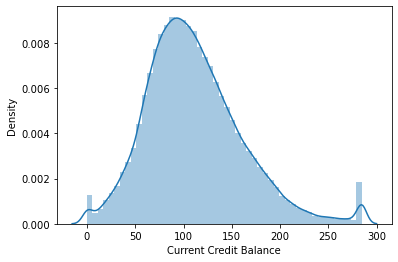

In [48]:
sns.distplot(data['Current Credit Balance']**(1/2))

In [49]:
data['Current Credit Balance']=data['Current Credit Balance']**(1/2)

In [50]:
data['Maximum Open Credit'].describe()

count     88910
unique    46625
top           0
freq        610
Name: Maximum Open Credit, dtype: object

In [51]:
data['Maximum Open Credit'].value_counts()

0        610
10782     10
14382     10
17464     10
11044     10
        ... 
46635      1
25110      1
54780      1
42402      1
53374      1
Name: Maximum Open Credit, Length: 46625, dtype: int64

In [52]:
#sns.distplot(data['Maximum Open Credit'])
#getting error because there are str charatcers present

In [53]:
#pd.to_numeric(data['Maximum Open Credit'])
#getting error for this one too because there is a string "#VALUE!"

In [54]:
data['Maximum Open Credit']=data['Maximum Open Credit'].replace('#VALUE!',np.nan,regex=True)

In [55]:
data['Maximum Open Credit']=pd.to_numeric(data['Maximum Open Credit'])

In [56]:
data['Maximum Open Credit'].isnull().sum()

2

In [57]:
data['Maximum Open Credit']=data['Maximum Open Credit'].fillna(35965)

In [58]:
data['Maximum Open Credit'].quantile([0.50,0.75,0.87,0.95,0.99,1])

0.50       21781.50
0.75       36367.00
0.87       50736.66
0.95       76600.80
0.99      171423.91
1.00    69988086.00
Name: Maximum Open Credit, dtype: float64

In [59]:
data.loc[data['Maximum Open Credit']>171423,'Maximum Open Credit']=171423

In [60]:
data['Bankruptcies'].describe()

count    88718.000000
mean         0.112672
std          0.343300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [61]:
data['Bankruptcies'].value_counts()

0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [62]:
data['Bankruptcies'].unique()

array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [63]:
data['Bankruptcies'].fillna(3)

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
88905    0.0
88906    0.0
88907    0.0
88908    0.0
88909    0.0
Name: Bankruptcies, Length: 88910, dtype: float64

In [64]:
cat_cols=['Term','Years in current job','Home Ownership','Purpose']
for c in cat_cols:
    data[c]=pd.factorize(data[c])[0]

In [65]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,0,728.0,0,0,46643.0,0,777.39,18.0,10.0,12,0,82.231381,7946.0,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,1,733.0,1,1,81099.0,0,892.09,26.7,NaN,14,0,188.960313,77961.0,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,0,724.0,2,1,60438.0,1,1244.02,16.7,32.0,11,1,106.183803,14815.0,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,0,740.0,3,0,34171.0,0,990.94,10.0,NaN,21,0,83.719771,43533.0,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,1,686.0,1,1,47003.0,1,503.71,16.7,25.0,13,1,130.049990,19553.0,1.0,0.0


In [66]:
#Soft Impute is a version of KNN
updated_data=pd.DataFrame(data=SoftImpute().fit_transform(data[data.columns[3:19]],),columns=data[data.columns[3:19]].columns,index=data.index)
df_LC=pd.get_dummies(updated_data,drop_first=True)

[SoftImpute] Max Singular Value of X_init = 11286279120.097357
[SoftImpute] Iter 1: observed MAE=23902.363865 rank=1
[SoftImpute] Iter 2: observed MAE=23902.349441 rank=1
[SoftImpute] Iter 3: observed MAE=23902.345720 rank=1
[SoftImpute] Iter 4: observed MAE=23902.344764 rank=1
[SoftImpute] Iter 5: observed MAE=23902.344599 rank=1
[SoftImpute] Iter 6: observed MAE=23902.344596 rank=1
[SoftImpute] Iter 7: observed MAE=23902.344635 rank=1
[SoftImpute] Iter 8: observed MAE=23902.344656 rank=1
[SoftImpute] Iter 9: observed MAE=23902.344667 rank=1
[SoftImpute] Iter 10: observed MAE=23902.344674 rank=1
[SoftImpute] Iter 11: observed MAE=23902.344677 rank=1
[SoftImpute] Stopped after iteration 11 for lambda=225725582.401947


In [67]:
lb_style=LabelBinarizer()
lb_results=lb_style.fit_transform(data['Loan Status'])
y=lb_results
y=y.ravel()

In [68]:
X_scaled=preprocessing.scale(df_LC)
print(X_scaled)
print('    ')
print(X_scaled.shape)

[[-0.40898231 -0.57302977  0.06287118 ... -0.79845518 -0.32793359
  -0.1095833 ]
 [-0.40861742  1.74511004  0.26110641 ...  1.83825771 -0.32793359
  -0.1095833 ]
 [-0.40887141 -0.57302977 -0.095717   ... -0.53977375  2.58785255
  -0.1095833 ]
 ...
 [-0.40863512 -0.57302977  0.77651802 ...  0.91232955 -0.32793359
  -0.1095833 ]
 [-0.40918791 -0.57302977 -0.1750111  ... -0.4039368  -0.32793359
  -0.1095833 ]
 [-0.40880492 -0.57302977 -0.33359928 ... -0.30218149 -0.32793359
   3.77361291]]
    
(88910, 16)


In [69]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=22)

In [70]:
def classify(est, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    est.fit(x, y)
    #Predicting the probabilities of the Tet data
    y2 = est.predict_proba(X_test)
    y1 = est.predict(X_test)

    print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))
    #Calculate different metrics
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(est, x, y))
    
    return est, y1, y2[:, 1]


#Function to find which features are more important than others through model
def feat_importance(estimator):
    feature_importance = {}
    for index, name in enumerate(df_LC.columns):
        feature_importance[name] = estimator.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)
    
    return sorted_x

#Write a function to pass the model and data
def run_models(X_train,y_train,y_test,model_type='Non-balanced'):
    clfs={'GradientBoosting':GradientBoostingClassifier(max_depth=6,n_estimators=100,max_features=0.3),
         'LogisticRegression':LogisticRegression(),
         'RandomForestClassifier': RandomForestClassifier(n_estimators=20),
         'XGBClassifier':XGBClassifier}
    cols=['model','matthews_corrcoef','roc_auc_score','precision_score','recall_score','f1_score']
    models_report=pd.DataFrame(columns=cols)
    conf_matrix=dict()
    
    for clf,clf_name in zip(clfs.values,clfs.keys()):
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        y_score=clf.predict_proba(X_test)[:1]
        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

In [71]:
#######Looking at other models using different classifiers
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=22)

[17:40:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.7259025981329434
Area under the ROC curve:  0.7409925012458062
F-metric:  0.3747541264004105
 
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82     18981
           1       0.55      0.28      0.37      7692

    accuracy                           0.73     26673
   macro avg       0.65      0.59      0.60     26673
weighted avg       0.70      0.73      0.69     26673

 
Evaluation by cross-validation:
[17:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logisti

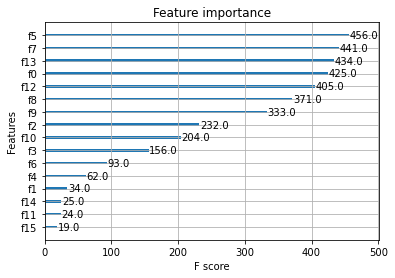

In [75]:
import operator
#Finding accuracy and feature importance using XGB classifier
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train,X_test,y_test)
print(xgb0.feature_importances_)
plot_importance(xgb0)
plt.show()
feat1 = feat_importance(xgb0)

In [76]:
#######K nearest Neighbour classifier ################

knc, y_p, y_p2 = classify(KNeighborsClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.6923105762381434
Area under the ROC curve:  0.664561330359015
F-metric:  0.3732722413134784
 
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.80     18981
           1       0.45      0.32      0.37      7692

    accuracy                           0.69     26673
   macro avg       0.60      0.58      0.58     26673
weighted avg       0.67      0.69      0.67     26673

 
Evaluation by cross-validation:
[0.7004338  0.70155848 0.69984735 0.70249859 0.69109022]


In [77]:
########Logistic Regression ##############
logit, y_p, y_p2 = classify(LogisticRegression(), X_train, y_train,X_test,y_test)

Accuracy:  0.7276271885427211
Area under the ROC curve:  0.7332265894818923
F-metric:  0.2814756206112155
 
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     18981
           1       0.59      0.18      0.28      7692

    accuracy                           0.73     26673
   macro avg       0.66      0.57      0.56     26673
weighted avg       0.70      0.73      0.67     26673

 
Evaluation by cross-validation:
[0.73674486 0.73682519 0.73583996 0.73656303 0.73391179]


In [78]:
########Decision Tree Classifier ##########
dtc, y_p, y_p2 = classify(DecisionTreeClassifier(), X_train, y_train,X_test,y_test)

Accuracy:  0.6561316687286769
Area under the ROC curve:  0.5795853021097295
F-metric:  0.40075787272964847
 
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     18981
           1       0.40      0.40      0.40      7692

    accuracy                           0.66     26673
   macro avg       0.58      0.58      0.58     26673
weighted avg       0.66      0.66      0.66     26673

 
Evaluation by cross-validation:
[0.6496626  0.65890103 0.65766851 0.66256929 0.65397284]


In [80]:
#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix

computing GradientBoosting - Non-balanced 
computing LogisticRegression - Non-balanced 
computing RandomForestClassifier - Non-balanced 
[17:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
computing XGBClassifier - Non-balanced 


,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.248781,0.753522,0.578189,0.259123,0.357864,Non-balanced
1,LogisticRegression,0.207548,0.735920,0.581743,0.184692,0.280372,Non-balanced
2,RandomForestClassifier,0.194449,0.699972,0.504222,0.243841,0.328716,Non-balanced
3,XGBClassifier,0.250344,0.745167,0.556376,0.287973,0.379514,Non-balanced


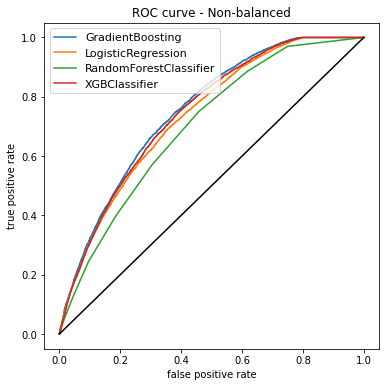

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test, model_type = 'Non-balanced')
models_report

In [82]:
from imblearn.over_sampling import SMOTE

computing GradientBoosting - Balanced 
computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 
[17:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
computing XGBClassifier - Balanced 


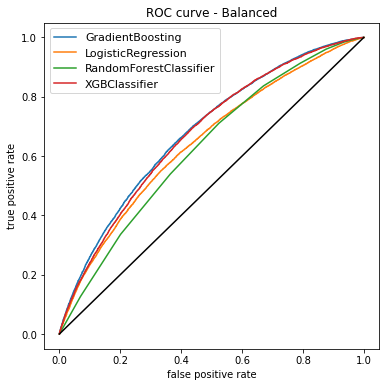

In [83]:
###########Synthetically balancing the dataset##################
index_split = int(len(X_scaled)/2)
X_train, y_train = SMOTE().fit_resample(X_scaled[0:index_split, :], y[0:index_split])
X_test, y_test = X_scaled[index_split:], y[index_split:]
models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

In [84]:
################Now we  know that GBM model performed the best so 
# save model
gbm=GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3)
gbm.fit(X_scaled, y)
joblib.dump(gbm, 'GBM_Model_version1.pkl')
# load model
#gbm_pickle = joblib.load('GBM_Model_version1.pkl')

['GBM_Model_version1.pkl']